In [2]:
import pickle
import pandas as pd
from sklearn import tree

data = pd.read_csv("data-turbine/clear-data-nox.csv")
model = pickle.load(open("data-turbine/tree-nox.model.sav", "rb"))
features = (
    data
    .drop(["NOX"], axis=1)
    .columns.values.tolist()
)

rules = tree.export_text(model, feature_names=features)
print(rules)

|--- AT <= 16.96
|   |--- TEY <= 118.41
|   |   |--- AT <= 10.84
|   |   |   |--- AT <= 7.75
|   |   |   |   |--- AFDP <= 3.08
|   |   |   |   |   |--- AFDP <= 2.68
|   |   |   |   |   |   |--- AFDP <= 2.54
|   |   |   |   |   |   |   |--- value: [102.29]
|   |   |   |   |   |   |--- AFDP >  2.54
|   |   |   |   |   |   |   |--- value: [93.81]
|   |   |   |   |   |--- AFDP >  2.68
|   |   |   |   |   |   |--- AP <= 1004.50
|   |   |   |   |   |   |   |--- value: [65.69]
|   |   |   |   |   |   |--- AP >  1004.50
|   |   |   |   |   |   |   |--- value: [84.70]
|   |   |   |   |--- AFDP >  3.08
|   |   |   |   |   |--- AT <= 6.44
|   |   |   |   |   |   |--- AP <= 1027.60
|   |   |   |   |   |   |   |--- value: [105.70]
|   |   |   |   |   |   |--- AP >  1027.60
|   |   |   |   |   |   |   |--- value: [94.80]
|   |   |   |   |   |--- AT >  6.44
|   |   |   |   |   |   |--- AP <= 1022.35
|   |   |   |   |   |   |   |--- value: [92.55]
|   |   |   |   |   |   |--- AP >  1022.35
|   |   |  

In [3]:
from src.rules import get_rules


rules = get_rules(model, features)
display(len(rules))
rules

126

[if (AT > 16.958) and (TEY <= 131.885) and (AT > 20.418) and (AT <= 22.746) and (AFDP <= 4.251) and (TEY <= 103.75) and (AT > 22.491) -> 45.744,
 if (AT <= 16.958) and (TEY > 118.405) and (TEY > 154.69) and (AP > 1021.95) and (AP > 1028.65) and (AFDP > 4.31) and (AFDP <= 4.999) -> 50.781,
 if (AT <= 16.958) and (TEY <= 118.405) and (AT <= 10.837) and (AT <= 7.752) and (AFDP <= 3.081) and (AFDP > 2.684) and (AP <= 1004.5) -> 65.69,
 if (AT <= 16.958) and (TEY <= 118.405) and (AT <= 10.837) and (AT <= 7.752) and (AFDP <= 3.081) and (AFDP > 2.684) and (AP > 1004.5) -> 84.697,
 if (AT <= 16.958) and (TEY <= 118.405) and (AT <= 10.837) and (AT <= 7.752) and (AFDP > 3.081) and (AT <= 6.44) and (AP <= 1027.6) -> 105.703,
 if (AT <= 16.958) and (TEY <= 118.405) and (AT <= 10.837) and (AT <= 7.752) and (AFDP > 3.081) and (AT <= 6.44) and (AP > 1027.6) -> 94.802,
 if (AT <= 16.958) and (TEY <= 118.405) and (AT <= 10.837) and (AT <= 7.752) and (AFDP > 3.081) and (AT > 6.44) and (AP <= 1022.35) ->

In [4]:
from src.rules import normalise_rules


rules = normalise_rules(rules)
display(len(rules))
rules

126

[if (AT > 16.958) and (AT <= 22.746) and (TEY <= 131.885) and (AFDP <= 4.251) -> 45.744,
 if (AT <= 16.958) and (TEY > 118.405) and (AP > 1021.95) and (AFDP > 4.31) and (AFDP <= 4.999) -> 50.781,
 if (AT <= 16.958) and (TEY <= 118.405) and (AFDP <= 3.081) and (AFDP > 2.684) and (AP <= 1004.5) -> 65.69,
 if (AT <= 16.958) and (TEY <= 118.405) and (AFDP <= 3.081) and (AFDP > 2.684) and (AP > 1004.5) -> 84.697,
 if (AT <= 16.958) and (TEY <= 118.405) and (AFDP > 3.081) and (AP <= 1027.6) -> 105.703,
 if (AT <= 16.958) and (TEY <= 118.405) and (AFDP > 3.081) and (AP > 1027.6) -> 94.802,
 if (AT <= 16.958) and (AT > 6.44) and (TEY <= 118.405) and (AFDP > 3.081) and (AP <= 1022.35) -> 92.554,
 if (AT <= 16.958) and (AT > 6.44) and (TEY <= 118.405) and (AFDP > 3.081) and (AP > 1022.35) -> 104.667,
 if (AT <= 16.958) and (AT > 7.752) and (TEY <= 118.405) and (AP <= 1019.95) and (AFDP <= 3.304) -> 100.502,
 if (AT <= 16.958) and (AT > 7.752) and (TEY <= 118.405) and (AP <= 1019.95) and (AFDP > 

In [5]:
from src.rules import delete_same_rules


rules = delete_same_rules(rules)
display(len(rules))
rules

106

[if (AT <= 16.958) and (TEY > 118.405) and (AP > 1021.95) and (AFDP > 4.31) and (AFDP <= 4.999) -> 50.781,
 if (AT <= 16.958) and (TEY <= 118.405) and (AFDP <= 3.081) and (AFDP > 2.684) and (AP <= 1004.5) -> 65.69,
 if (AT <= 16.958) and (TEY <= 118.405) and (AFDP <= 3.081) and (AFDP > 2.684) and (AP > 1004.5) -> 84.697,
 if (AT <= 16.958) and (TEY <= 118.405) and (AFDP > 3.081) and (AP <= 1027.6) -> 105.703,
 if (AT <= 16.958) and (TEY <= 118.405) and (AFDP > 3.081) and (AP > 1027.6) -> 94.802,
 if (AT <= 16.958) and (AT > 6.44) and (TEY <= 118.405) and (AFDP > 3.081) and (AP <= 1022.35) -> 92.554,
 if (AT <= 16.958) and (AT > 6.44) and (TEY <= 118.405) and (AFDP > 3.081) and (AP > 1022.35) -> 104.667,
 if (AT <= 16.958) and (AT > 7.752) and (TEY <= 118.405) and (AP <= 1019.95) and (AFDP <= 3.304) -> 100.502,
 if (AT <= 16.958) and (AT > 7.752) and (TEY <= 118.405) and (AP <= 1019.95) and (AFDP > 3.304) -> 118.67,
 if (AT <= 16.958) and (AT > 7.752) and (TEY <= 118.405) and (AP > 1019

In [6]:
from sklearn.model_selection import train_test_split

random_state = 9

y = data["NOX"]
X = data.drop(["NOX"], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)
display(X_train, y_train, X_test, y_test)

AT      AP    AFDP     TEY
4480   26.6350  1009.7  4.4137  147.37
24883  20.2280  1016.2  4.6238  154.71
21557  15.6330  1018.5  4.0899  154.26
1705   16.6540  1020.2  4.5755  132.60
21388  21.0020  1004.3  4.1101  153.48
...        ...     ...     ...     ...
25725  17.5190  1015.9  3.6809  125.22
5014   21.9780  1014.4  3.1246  110.81
22584   4.7103  1003.0  3.2741  127.67
501     6.7758  1008.3  5.1192  166.46
20828  17.6730  1020.7  3.0370  127.08

[29386 rows x 4 columns]

4480     52.970
24883    58.801
21557    78.066
1705     73.955
21388    79.989
          ...  
25725    53.424
5014     58.462
22584    65.275
501      65.469
20828    77.008
Name: NOX, Length: 29386, dtype: float64

AT      AP    AFDP     TEY
18246  23.4530  1006.2  3.7535  132.47
20343  28.7090  1011.2  6.0321  145.91
2924   21.8330  1017.0  3.9663  139.04
117     7.8167  1022.2  4.6605  164.73
5713   19.9120  1013.1  3.6710  126.90
...        ...     ...     ...     ...
21917   9.5791  1017.5  2.9617  130.74
13099  22.6150  1012.1  4.2739  133.44
26704  28.4020  1004.4  4.0643  123.17
4182   31.7400  1012.2  4.5323  148.16
2982   23.7130  1013.5  3.7112  134.75

[7347 rows x 4 columns]

18246    58.948
20343    62.909
2924     61.083
117      66.369
5713     56.675
          ...  
21917    71.316
13099    63.308
26704    49.210
4182     59.452
2982     66.807
Name: NOX, Length: 7347, dtype: float64

In [7]:
from src.rules import simplify_rules

rules = simplify_rules(X_train, rules)
rules

[if (AT = -6.235) and (TEY = 179.5) and (AP = 1036.6) and (AFDP = 4.654) -> 50.781,
 if (AT = -6.235) and (TEY = 100.02) and (AFDP = 2.883) and (AP = 985.85) -> 65.69,
 if (AT = -6.235) and (TEY = 100.02) and (AFDP = 2.883) and (AP = 1036.6) -> 84.697,
 if (AT = -6.235) and (TEY = 100.02) and (AFDP = 7.611) and (AP = 985.85) -> 105.703,
 if (AT = -6.235) and (TEY = 100.02) and (AFDP = 7.611) and (AP = 1036.6) -> 94.802,
 if (AT = 11.699) and (TEY = 100.02) and (AFDP = 7.611) and (AP = 985.85) -> 92.554,
 if (AT = 11.699) and (TEY = 100.02) and (AFDP = 7.611) and (AP = 1036.6) -> 104.667,
 if (AT = 12.355) and (TEY = 100.02) and (AP = 985.85) and (AFDP = 2.099) -> 100.502,
 if (AT = 12.355) and (TEY = 100.02) and (AP = 985.85) and (AFDP = 7.611) -> 118.67,
 if (AT = 12.355) and (TEY = 100.02) and (AP = 1036.6) -> 112.907,
 if (AT = 12.355) and (TEY = 112.068) and (AFDP = 2.099) -> 86.027,
 if (AT = 12.355) and (TEY = 112.068) and (AFDP = 7.611) -> 92.86,
 if (AT = 12.355) and (TEY = 112

In [8]:
data.describe().transpose()

count         mean        std       min        25%        50%  \
AT    36733.0    17.712726   7.447451   -6.2348    11.7810    17.8010   
AP    36733.0  1013.070165   6.463346  985.8500  1008.8000  1012.6000   
AFDP  36733.0     3.925518   0.773936    2.0874     3.3556     3.9377   
TEY   36733.0   133.506404  15.618634  100.0200   124.4500   133.7300   
NOX   36733.0    65.293067  11.678357   25.9050    57.1620    63.8490   

            75%        max  
AT      23.6650    37.1030  
AP    1017.0000  1036.6000  
AFDP     4.3769     7.6106  
TEY    144.0800   179.5000  
NOX     71.5480   119.9100

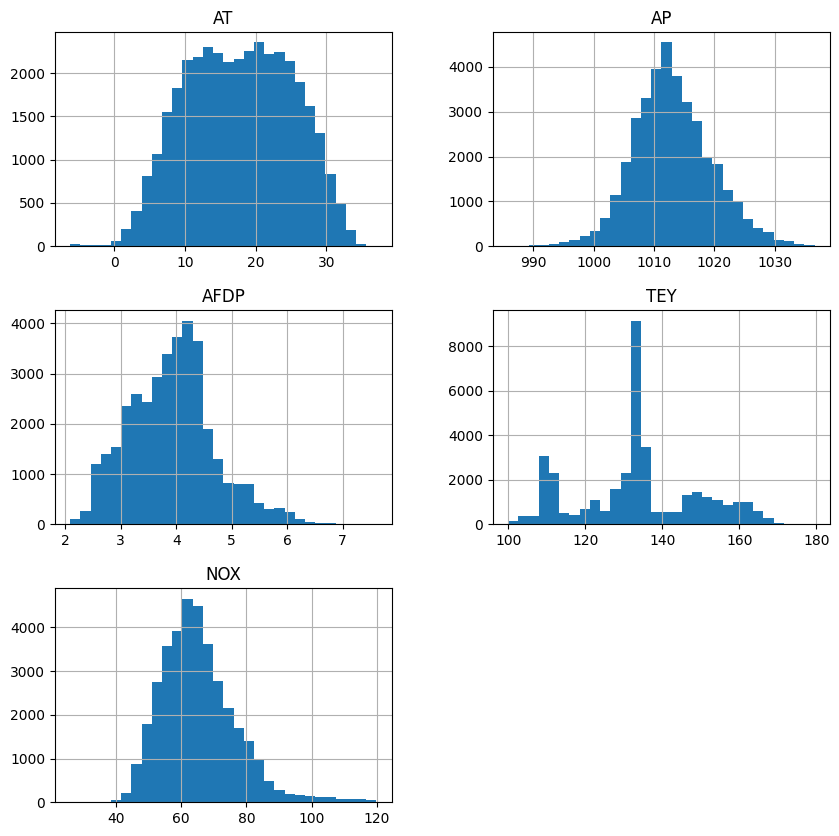

In [9]:
import matplotlib.pyplot as plt

data.hist(bins=30, figsize=(10, 10))
plt.show()

/Users/user/Projects/python/fuzzy-rules-generator/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


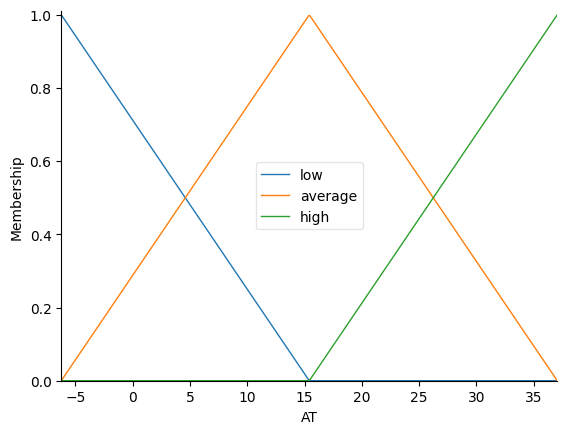

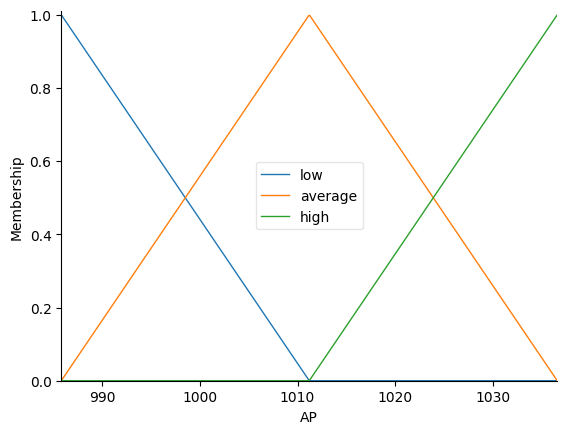

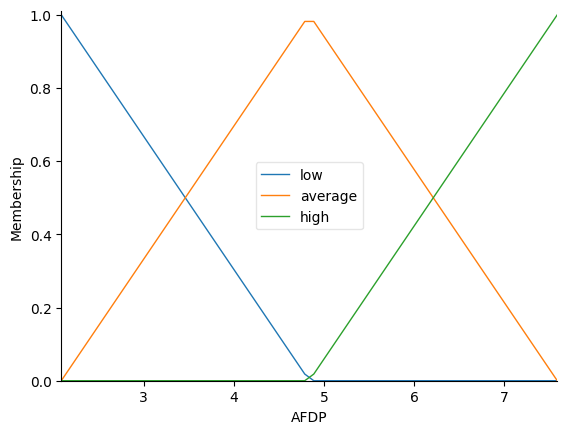

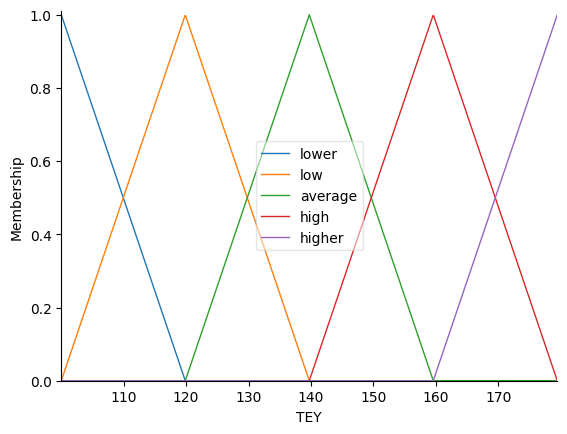

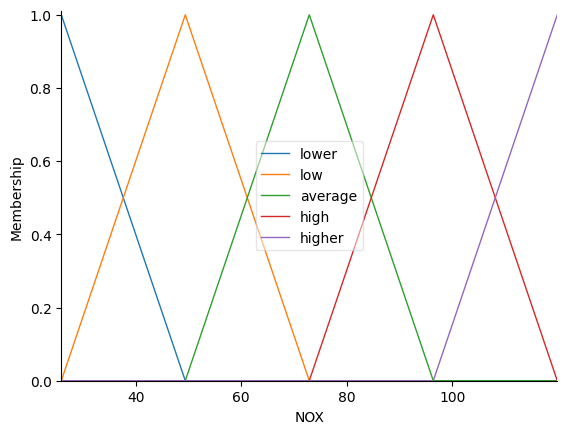

In [18]:
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz

AT = ctrl.Antecedent(np.arange(-6.2348, 37.103, 0.1), "AT")
AP = ctrl.Antecedent(np.arange(985.85, 1036.6, 0.1), "AP")
# AH = ctrl.Antecedent(np.arange(24.085, 100.2, 0.001), "AH")
AFDP = ctrl.Antecedent(np.arange(2.0874, 7.6106, 0.1), "AFDP")
TEY = ctrl.Antecedent(np.arange(100.02, 179.5, 0.1), "TEY")
# TIT = ctrl.Antecedent(np.arange(1000.8, 1100.9, 0.1), "TIT")
# TAT = ctrl.Antecedent(np.arange(511.04, 550.61, 0.01), "TAT")
NOX = ctrl.Consequent(np.arange(25.905, 119.91, 0.1), "NOX")

AT.automf(3, variable_type="quant")
AT.view()
AP.automf(3, variable_type="quant")
AP.view()
# AH.automf(3, variable_type="quant")
AFDP.automf(3, variable_type="quant")
AFDP.view()
TEY.automf(5, variable_type="quant")
TEY.view()
# TIT.automf(5, variable_type="quant")
# TAT.automf(5, variable_type="quant")
# NOX.automf(names=[str(i) for i in range(1, 16)], variable_type="quant")
NOX.automf(5, variable_type="quant")
NOX.view()

In [19]:
from src.rules import get_fuzzy_rules

fuzzy_variables = {
    "AT": AT,
    "AP": AP,
    # "AH": AH,
    "AFDP": AFDP,
    "TEY": TEY,
    # "TIT": TIT,
    # "TAT": TAT,
    "consequent": NOX,
}
fuzzy_rules = get_fuzzy_rules(rules, fuzzy_variables)

fuzzy_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(fuzzy_cntrl, lenient=False)

display(len(fuzzy_rules))
fuzzy_rules

72

[IF ((AT[low] AND TEY[lower]) AND AFDP[low]) AND AP[low] THEN NOX[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((AT[low] AND TEY[lower]) AND AFDP[low]) AND AP[high] THEN NOX[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((AT[low] AND TEY[lower]) AND AFDP[high]) AND AP[low] THEN NOX[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((AT[low] AND TEY[lower]) AND AFDP[high]) AND AP[high] THEN NOX[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((AT[average] AND TEY[lower]) AND AFDP[high]) AND AP[high] THEN NOX[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((AT[average] AND TEY[lower]) AND AP[low]) AND AFDP[low] THEN NOX[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((AT[average] AND TEY[lower]) AND AP[low]) AND AFDP[high] THEN NOX[higher]
 	AND aggregation function : fmin
 	OR aggregation functio

 Antecedents 
Antecedent: AT                      = 4.5878
  - low                             : 0.5001108545034625
  - average                         : 0.4998891454965375
  - high                            : 0.0
Antecedent: TEY                     = 134.67
  - lower                           : 0.0
  - low                             : 0.25440806045330117
  - average                         : 0.745591939546699
  - high                            : 0.0
  - higher                          : 0.0
Antecedent: AFDP                    = 3.5758
  - low                             : 0.4587636363636368
  - average                         : 0.5412363636363632
  - high                            : 0.0
Antecedent: AP                      = 1018.7
  - low                             : 0.0
  - average                         : 0.7041420118346117
  - high                            : 0.2958579881653883

 Rules 
RULE #0:
  IF ((AT[low] AND TEY[lower]) AND AFDP[low]) AND AP[low] THEN NOX[average]
	AND

np.float64(73.82267305642429)

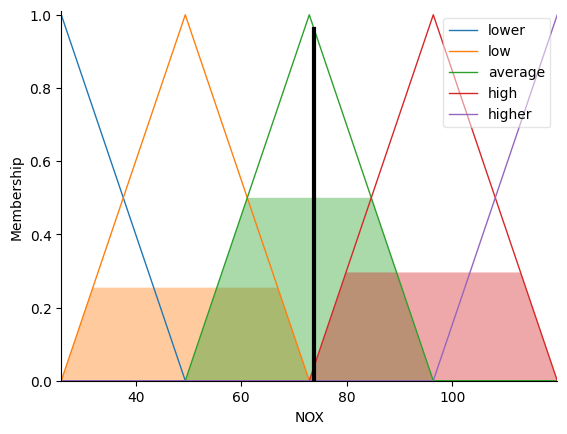

In [20]:
sim.input["AT"] = 4.5878
sim.input["AP"] = 1018.7
sim.input["AFDP"] = 3.5758
sim.input["TEY"] = 134.67
# sim.input["AH"] = 83.675
# sim.input["TIT"] = 1086.2
# sim.input["TAT"] = 549.83

# sim.input["AT"] = 31.6890
# sim.input["AP"] = 1010.9
# sim.input["AFDP"] = 4.1312
# sim.input["TEY"] = 128.03

# sim.input["AT"] = 10.9920
# sim.input["AP"] = 1022.4
# sim.input["AFDP"] = 3.2764
# sim.input["TEY"] = 107.81

sim.compute()
sim.print_state()
display(sim.output["NOX"])
NOX.view(sim=sim)

In [21]:
from sklearn import metrics
import math


def fuzzy_pred(row):
    sim.input["AT"] = row["AT"]
    sim.input["AP"] = row["AP"]
    # sim.input["AH"] = row["AH"]
    sim.input["AFDP"] = row["AFDP"]
    sim.input["TEY"] = row["TEY"]
    # sim.input["TIT"] = row["TIT"]
    # sim.input["TAT"] = row["TAT"]
    sim.compute()
    return sim.output["NOX"]


def rmse(row):
    return math.sqrt(metrics.mean_squared_error([row["Real"]], [row["Inferred"]]))

result_train = X_train.copy()
result_train["Real"] = y_train
result_train = result_train[:1000]

result_train["Inferred"] = result_train.apply(fuzzy_pred, axis=1)
result_train["RMSE"] = result_train.apply(rmse, axis=1)
result_train = result_train.round({"RMSE": 3})
result_train

AT      AP    AFDP     TEY    Real   Inferred    RMSE
4480   26.635  1009.7  4.4137  147.37  52.970  67.086670  14.117
24883  20.228  1016.2  4.6238  154.71  58.801  72.905000  14.104
21557  15.633  1018.5  4.0899  154.26  78.066  84.018438   5.952
1705   16.654  1020.2  4.5755  132.60  73.955  66.957871   6.997
21388  21.002  1004.3  4.1101  153.48  79.989  62.212277  17.777
...       ...     ...     ...     ...     ...        ...     ...
10954  24.943  1008.7  4.3612  134.03  58.373  70.229758  11.857
13826  21.067  1008.6  3.7510  110.82  56.018  70.831432  14.813
11719  25.398  1011.2  4.2003  134.57  63.884  72.264646   8.381
25984  26.971  1012.9  4.5755  142.66  50.047  71.834282  21.787
826    14.198  1017.8  5.1631  156.30  71.731  72.905000   1.174

[1000 rows x 7 columns]

In [22]:
result_train.sort_values(by="RMSE", ascending=False)[result_train["RMSE"] < 10]

/var/folders/yr/lls0svhd1fl_wljz9zn7kgzh0000gn/T/ipykernel_20346/3258912175.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_train.sort_values(by="RMSE", ascending=False)[result_train["RMSE"] < 10]


AT      AP    AFDP     TEY    Real   Inferred   RMSE
35869  13.8420  1016.4  2.9790  119.38  62.926  72.911271  9.985
2788   23.7410  1013.2  4.4428  155.66  59.277  69.254744  9.978
25009  16.0880  1013.2  3.1244  109.36  63.783  73.758193  9.975
653     4.8703  1021.4  3.7381  134.45  85.455  75.484136  9.971
23910   9.4240  1013.0  3.6061  134.83  62.950  72.905000  9.955
...        ...     ...     ...     ...     ...        ...    ...
13289  14.9210  1013.6  4.1546  134.36  72.532  72.466529  0.065
805    15.0610  1019.6  5.1283  156.42  72.956  72.905000  0.051
29530   5.4779  1025.5  4.1873  164.35  61.087  61.035576  0.051
30610   8.6534  1028.3  3.0518  126.87  72.872  72.905000  0.033
1375    8.2717  1020.1  5.5121  165.06  60.380  60.403821  0.024

[493 rows x 7 columns]

In [23]:
result_test = X_test.copy()
result_test["Real"] = y_test
# result_test = result_test[:items_count]

result_test["Inferred"] = result_test.apply(fuzzy_pred, axis=1)
result_test["RMSE"] = result_test.apply(rmse, axis=1)
result_test = result_test.round({"RMSE": 3})
result_test

AT      AP    AFDP     TEY    Real   Inferred    RMSE
18246  23.4530  1006.2  3.7535  132.47  58.948  72.803707  13.856
20343  28.7090  1011.2  6.0321  145.91  62.909  72.905000   9.996
2924   21.8330  1017.0  3.9663  139.04  61.083  71.524689  10.442
117     7.8167  1022.2  4.6605  164.73  66.369  53.699822  12.669
5713   19.9120  1013.1  3.6710  126.90  56.675  71.033461  14.358
...        ...     ...     ...     ...     ...        ...     ...
21917   9.5791  1017.5  2.9617  130.74  71.316  72.905000   1.589
13099  22.6150  1012.1  4.2739  133.44  63.308  70.603730   7.296
26704  28.4020  1004.4  4.0643  123.17  49.210  70.451105  21.241
4182   31.7400  1012.2  4.5323  148.16  59.452  68.790536   9.339
2982   23.7130  1013.5  3.7112  134.75  66.807  70.384421   3.577

[7347 rows x 7 columns]

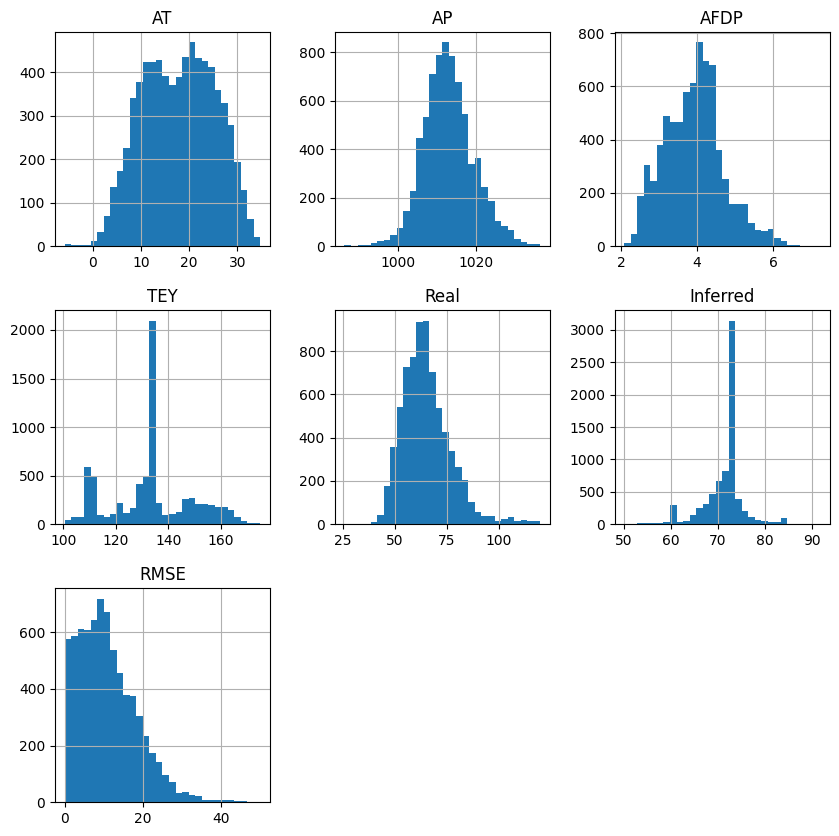

In [24]:
result_test.hist(bins=30, figsize=(10, 10))
plt.show()

In [25]:
rmetrics = {}
rmetrics["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["RMAE_train"] = math.sqrt(
    metrics.mean_absolute_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["MAE_train"] = float(
    metrics.mean_absolute_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["MAE_test"] = float(
    metrics.mean_absolute_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["R2_train"] = metrics.r2_score(result_train["Real"], result_train["Inferred"])
rmetrics["R2_test"] = metrics.r2_score(result_test["Real"], result_test["Inferred"])

rmetrics

{'RMSE_train': 12.98734738523384,
 'RMSE_test': 13.28470315504043,
 'RMAE_train': 3.2974956651470366,
 'RMAE_test': 3.3117541879627588,
 'MAE_train': 10.873477661663498,
 'MAE_test': 10.967715801488872,
 'R2_train': -0.28702863717588256,
 'R2_test': -0.26174697467774677}